In [1]:
# Imports the pandas library for data manipulation and analysis, using the alias 'pd'
import pandas as pd          

# Imports the matplotlib library's pyplot module for creating visualizations, using the alias 'plt'
import matplotlib.pyplot as plt  

# Imports the seaborn library for advanced and aesthetically pleasing statistical data visualization
import seaborn as sns

In [11]:
path = r"C:\Users\hosam\Downloads\access_electricity.csv"  # Defines the file path (as a raw string) to the CSV file containing the dataset
df = pd.read_csv(path)  # Reads the CSV file from the specified path into a pandas DataFrame named 'df'

### 1. Description  

The dataset contains information on the percentage of population with access to electricity for countries around the world, covering the years 2012–2016.
Each row represents a country, with its name, code, the series name and code (which are identical for all rows), the yearly data columns, and the continent where the country is located.

In [31]:
df.head()  # Shows the first 5 rows of the DataFrame

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


### 2. Initial Exploration

#### 2.1 Number of rows and columns

In [20]:
df.shape  # Returns the number of rows and columns in the DataFrame

(242, 10)

The dataset has 242 rows and 11 columns, meaning 242 countries and 11 variables.

#### 2.2 Data types

In [24]:
df.dtypes  # Shows the data type of each column

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
2016 [YR2016]    object
Continent        object
dtype: object

- The columns "Country Name", "Country Code", "Series Name", "Series Code", and "continent" are text/object type.  
- The columns for each year (2012–2016) must be converted to numeric (float), as they represent the percentage of population with access to electricity.
- It’s possible that some numeric columns contain missing values (NaN) for countries without available data.

- Data type change for year (2012-2016)

In [75]:
cols_year = ['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']  # List of year columns to convert
df[cols_year] = df[cols_year].apply(pd.to_numeric, errors='coerce')  # Converts selected columns to numeric, replacing invalid values with NaN

- To check missing values:

In [46]:
df.isna().sum()  # Counts missing (NaN) values in each column

Country Name      0
Country Code      0
Series Name       0
Series Code       0
2012 [YR2012]     0
2013 [YR2013]     0
2014 [YR2014]     0
2015 [YR2015]     0
2016 [YR2016]     0
Continent        14
dtype: int64

- Till this point missing values seems to be only within "Continent" column 

### 3. Four Data Selections (two using .loc[], one using .iloc[])

#### 3.1 Selection 1 – African countries (using .loc[])

In [57]:
cols_to_show = ["Country Name", "Continent", "2016 [YR2016]"]  # Selects columns to display
africa_2016 = df.loc[df["Continent"] == "Africa", cols_to_show]  # Filters rows for Africa and keeps chosen columns
africa_2016.head()  # Shows the first 5 rows of the filtered data

,Country Name,Continent,2016 [YR2016]
2,Algeria,Africa,99.439567565918
5,Angola,Africa,40.5206069946289
21,Benin,Africa,41.4026145935059
26,Botswana,Africa,60.6883964538574
31,Burkina Faso,Africa,19.1647129058838


- .loc[] has been used to filter rows by a condition (continent = Africa) and to keep only the relevant columns. The idea was to focus on one region that often has lower electricity access.

#### 3.2 Selection 2 – first 5 rows (using .iloc[])

In [63]:
first_five = df.iloc[:5, :]  # Selects the first 5 rows and all columns
first_five  # Displays the selected rows

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


- .iloc[] has been used to allow for visual inspection of the first 5 rows of the dataset using index position

#### 3.3 Selection 3 – countries below 80% in 2016

In [77]:
low_access_2016 = df[df["2016 [YR2016]"] < 80][["Country Name", "Continent", "2016 [YR2016]"]]  # Filters countries with electricity access below 80% in 2016
low_access_2016.head()  # Shows the first 5 rows of the filtered data

,Country Name,Continent,2016 [YR2016]
5,Angola,Africa,40.520607
16,Bangladesh,Asia,75.920000
21,Benin,Africa,41.402615
26,Botswana,Africa,60.688396
31,Burkina Faso,Africa,19.164713


- shows countries that still had relatively low access to electricity in 2016, (maybe some improvement needed, Boh!)

#### 3.4 Selection 4 - only the year columns

In [81]:
year_cols = ["2012 [YR2012]", "2013 [YR2013]", "2014 [YR2014]", "2015 [YR2015]", "2016 [YR2016]"]  # List of year columns
df_years = df[year_cols]  # Creates a new DataFrame with only the year columns
df_years.head()  # Shows the first 5 rows of the new DataFrame

,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,69.10000,67.259552,89.500000,71.500000,84.137138
1,100.00000,100.000000,100.000000,100.000000,100.000000
2,98.76466,99.134987,99.234344,99.336708,99.439568
3,NaN,NaN,NaN,NaN,NaN
4,100.00000,100.000000,100.000000,100.000000,100.000000


- It can be noticed the presence of null values, anyway not our main focus now

### 4. Two Sortings (one ascending, one descending)

#### 4.1 Sorting 1 – Ascending order by 2016 access

In [88]:
sorted_asc = df.sort_values(by="2016 [YR2016]", ascending=True)  # Sorts the DataFrame by 2016 values in ascending order
sorted_asc.head()  # Shows the first 5 rows of the sorted data

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
32,Burundi,BDI,Access to electricity (% of population),EG.ELC.ACCS.ZS,6.500000,6.583319,7.000000,7.252090,7.588477,Africa
39,Chad,TCD,Access to electricity (% of population),EG.ELC.ACCS.ZS,7.069442,7.503673,7.943912,7.700000,8.830898,Africa
199,South Sudan,SSD,Access to electricity (% of population),EG.ELC.ACCS.ZS,4.912345,5.915033,6.923728,7.935428,8.947628,Africa
135,Malawi,MWI,Access to electricity (% of population),EG.ELC.ACCS.ZS,7.400000,9.000000,11.900000,10.800000,11.000000,Africa
38,Central African Republic,CAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,11.595876,12.187052,12.784236,13.384423,13.985112,Africa


- Ascending order based on 2016 access to electricity to help identify countries with the lowest electrification levels.

#### 4.2 Sorting 2 – Descending order by 2016 access

In [92]:
sorted_desc = df.sort_values(by="2016 [YR2016]", ascending=False)  # Sorts the DataFrame by 2016 values in descending order
sorted_desc.head()  # Shows the first 5 rows of the sorted data

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
104,Israel,ISR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.0,100.0,Asia
109,Kazakhstan,KAZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.874733,99.951614,99.988144,100.0,100.0,Asia
113,"Korea, Rep.",KOR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.0,100.0,Asia
114,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.773651,99.942505,99.993134,100.0,100.0,Europe
115,Kuwait,KWT,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.0,100.0,Asia


- Countries with the highest access to electricity, typically developed nations with  100% coverage.

### 5. New Column Using apply and lambda

#### new column showing whether each country reached access (≥ 95%) in 2016

In [98]:
df["Access 2016"] = df["2016 [YR2016]"].apply(lambda x: "Yes" if x >= 95 else "No")  # Creates a new column marking countries with ≥95% access as 'Yes', others as 'No'
df[["Country Name", "2016 [YR2016]", "Access 2016"]].head()  # Shows first 5 rows with country, 2016 access %, and new label

,Country Name,2016 [YR2016],Access 2016
0,Afghanistan,84.137138,No
1,Albania,100.000000,Yes
2,Algeria,99.439568,Yes
3,American Samoa,NaN,No
4,Andorra,100.000000,Yes


- Apply() function with lambda expression were used to create a new column named "Access 2016", that classifies each country as "Yes" if access is 95% or more, and "No" if not. An easier way to group or count countries that have achieved near-universal electricity coverage.

### 6. Graphs 

#### 6.1 Histogram – distribution of latest year (2016)

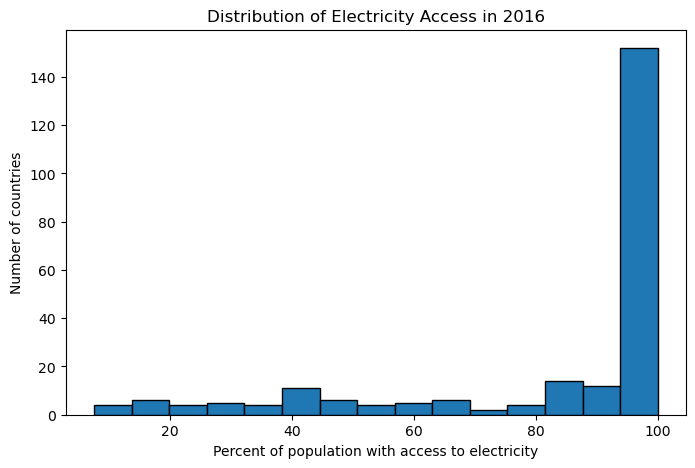

In [108]:
plt.figure(figsize=(8,5))  # Sets the figure size for the plot
df["2016 [YR2016]"].dropna().plot(kind='hist', bins=15, edgecolor='black')  # Plots a histogram of 2016 electricity access values
plt.title('Distribution of Electricity Access in 2016')  # Adds a title to the plot
plt.xlabel('Percent of population with access to electricity')  # Labels the x-axis
plt.ylabel('Number of countries')  # Labels the y-axis
plt.show()  # Displays the plot

- The histogram shows electricity access is distribution across countries in 2016.
- Majority of countries cluster at high percentages.
- Bars at the lower end indicate countries that still lag behind.

#### 6.2 Box plot – 2016 access by continent

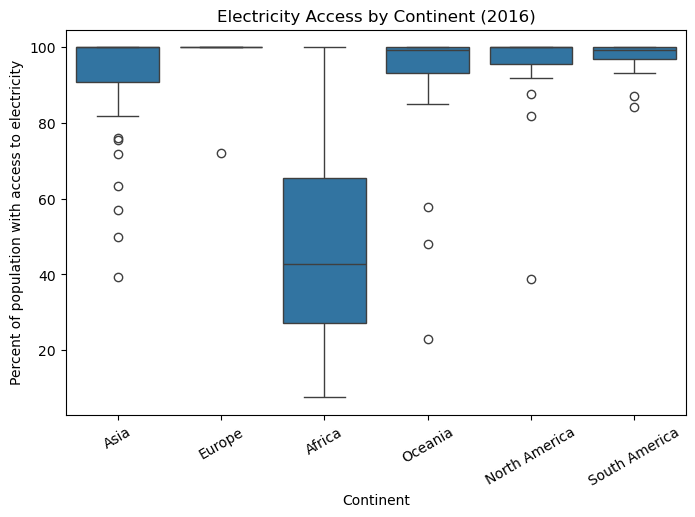

In [114]:
plt.figure(figsize=(8,5))  # Sets the size of the plot
sns.boxplot(data=df, x="Continent", y="2016 [YR2016]")  # Creates a boxplot of 2016 electricity access by continent
plt.title("Electricity Access by Continent (2016)")  # Adds a title to the plot
plt.xlabel("Continent")  # Labels the x-axis
plt.ylabel("Percent of population with access to electricity")  # Labels the y-axis
plt.xticks(rotation=30)  # Rotates x-axis labels for better readability
plt.show()  # Displays the plot

- The box plots compare electricity access across continents in 2016.
- The median lines show the typical country in each continent, while the boxes height show inequality within that continent.
- Continents with lower medians or wider boxes have more challenges.

#### 6.3 Scatter plot – progress from 2012 to 2016

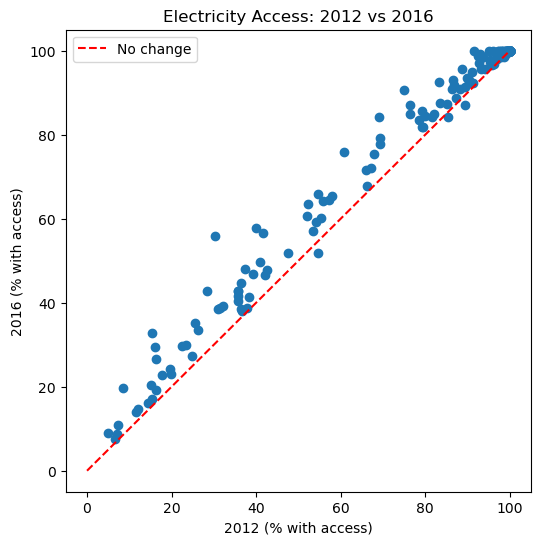

In [120]:
plt.figure(figsize=(6,6))  # Sets the figure size for the scatter plot
plt.scatter(df["2012 [YR2012]"], df["2016 [YR2016]"])  # Plots 2012 vs 2016 electricity access values
# diagonal reference line
max_val = max(df["2016 [YR2016]"].max(), df["2016 [YR2016]"].max())  # Finds the maximum value for setting axis limits
plt.plot([0, max_val], [0, max_val], "r--", label="No change")  # Adds a red dashed line showing equal 2012 and 2016 values

plt.title("Electricity Access: 2012 vs 2016")  # Adds a title to the plot
plt.xlabel("2012 (% with access)")  # Labels the x-axis
plt.ylabel("2016 (% with access)")  # Labels the y-axis
plt.legend()  # Displays the legend
plt.show()  # Shows the plot

- The scatter plot compares each country’s access to electricity in 2012 and 2016.
- Points above the red dashed line represent countries that increased access over the period.
- The closer a point is to the top-left, the higher the improvement potential; the closer to top-right, the country was already high.

#### 6.4 Line plot – global average over time (2012–2016)

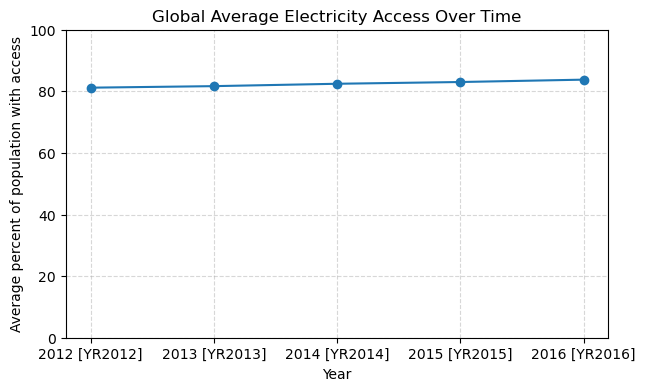

In [127]:
year_cols = ["2012 [YR2012]", "2013 [YR2013]", "2014 [YR2014]", "2015 [YR2015]", "2016 [YR2016]"]  # List of year columns

# compute global mean per year (ignore NaNs)
global_means = df[year_cols].mean()  # Calculates the average electricity access for each year

plt.figure(figsize=(7,4))  # Sets the plot size
plt.plot(year_cols, global_means, marker="o")  # Plots the global averages over time with circular markers
plt.title("Global Average Electricity Access Over Time")  # Adds a title
plt.xlabel("Year")  # Labels the x-axis
plt.ylabel("Average percent of population with access")  # Labels the y-axis
plt.ylim(0, 100)  # Sets y-axis range to 0–100%
plt.grid(True, linestyle='--', alpha=0.5)  # Adds a light dashed grid
plt.show()  # Displays the plot

- The line chart shows the overall trend in electricity access across all countries from 2012 to 2016.
- Aggregating to a global average avoids overcrowded plots and clearly shows whether access is improving worldwide.

#### 6.5 Bar chart – Bottom 10 countries in 2016

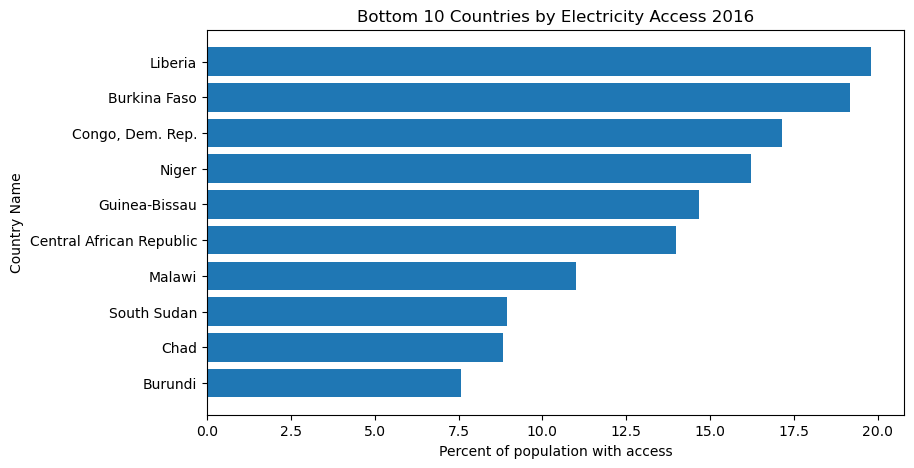

In [133]:
year_col = "2016 [YR2016]"  # Selects the year column to analyze

bottom10 = df[["Country Name", year_col]].dropna().sort_values(by=year_col).head(10)  # Gets the 10 countries with the lowest access in 2016

plt.figure(figsize=(9,5))  # Sets the plot size
plt.barh(bottom10["Country Name"], bottom10[year_col])  # Creates a horizontal bar chart
plt.title("Bottom 10 Countries by Electricity Access 2016")  # Adds a title
plt.xlabel("Percent of population with access")  # Labels the x-axis
plt.ylabel("Country Name")  # Labels the y-axis
plt.show()  # Displays the plot

- The bar chart focuses on the 10 countries with the lowest electricity access in 2016.
- Showing only the lowest values highlights where development efforts might be most needed.

### 7. Summary

- The analysis shows that between 2012 and 2016, the average percentage of the population with access to electricity increased in almost all countries.
However, large differences persist between continents: Africa and parts of Oceania have the lowest average values, while Europe and North America show almost full access.
Overall, the global trend is positive but uneven, suggesting the need for targeted policies for less developed areas.
Future developments could include extending the period of analysis, adding socioeconomic data, and exploring correlations with per capita income or urbanization.
